In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sys
sys.path.append('../pipeline')
%load_ext autoreload
%autoreload 2

In [3]:
df_train = pd.read_csv('data/onetwotrip_challenge_train.csv')
df_test = pd.read_csv('data/onetwotrip_challenge_test.csv')

In [4]:
price_field = 'field1'
price2_field = 'field14'

In [5]:
data = pd.concat([df_train, df_test], axis=0, sort=False )

In [6]:
data = data.fillna(-1)

(-1, 10)

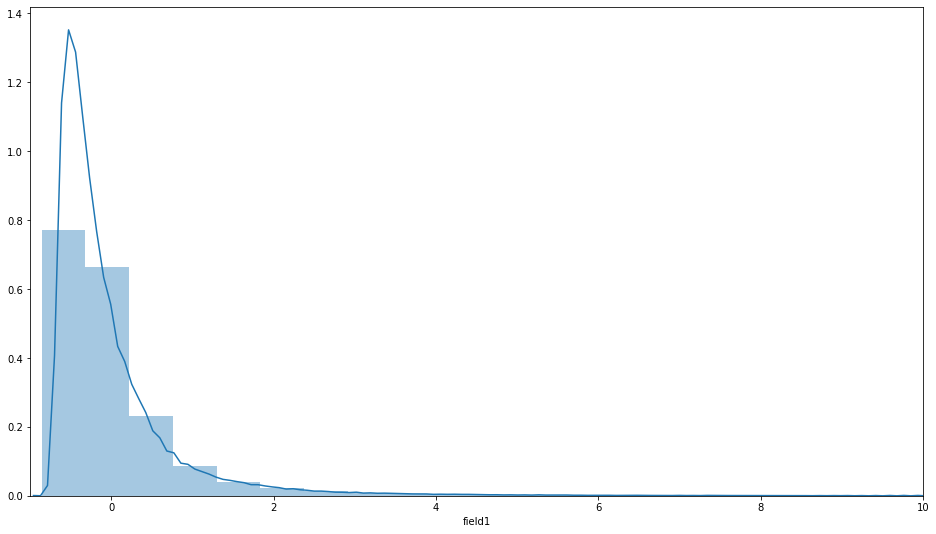

In [7]:
plt.figure(figsize=(16,9))
sns.distplot(data[data[price_field] < 10][price_field], bins=20)
plt.xlim(-1,10)

In [8]:
data[price_field].value_counts()

-0.548937     69415
-0.471365     68709
-0.393794     60662
-0.626508     53536
-0.316223     52086
              ...  
 18.999046        1
 21.093473        1
 33.582462        1
 27.376753        1
 82.142134        1
Name: field1, Length: 317, dtype: int64

In [9]:
data[price2_field].value_counts()

-0.521242     99056
-0.381176     89226
-0.661308     85765
-0.241109     67232
-0.101043     50935
              ...  
 25.951306        1
 27.912236        1
 41.918875        1
 16.426792        1
 25.250974        1
Name: field14, Length: 199, dtype: int64

In [10]:
data[price_field].value_counts().sort_index().reset_index()['index'].diff().value_counts().reset_index()['level_0'] / 0.077571

0       1.000005
1       1.000005
2       1.000005
3       1.000005
4       1.000005
5       1.000005
6       1.000005
7       1.000005
8       1.000005
9       2.000009
10      1.000005
11      2.000009
12      2.000009
13      3.000014
14      2.000009
15      1.000005
16      1.000005
17      5.000023
18      1.000005
19      5.000023
20      1.000005
21      3.000014
22      1.000005
23      3.000014
24      1.000005
25      1.000005
26     10.000047
27      3.000014
28     13.000060
29      1.000005
30     33.000154
31      1.000005
32      7.000033
33     27.000126
34     21.000098
35      6.000028
36      2.000009
37      1.000005
38     71.000330
39     37.000172
40      1.000005
41      4.000019
42      1.000005
43      1.000005
44      2.000009
45    373.001735
46      1.000005
47      4.000019
48      3.000014
49     16.000074
50      1.000005
51      7.000033
52      1.000005
53     71.000330
54      1.000005
55      2.000009
56      9.000042
Name: level_0, dtype: float64

In [11]:
data[price2_field].value_counts().sort_index().reset_index()['index'].diff().value_counts().reset_index()['level_0'] / 0.140066

0      1.000003
1      1.000003
2      1.000003
3      1.000003
4      1.000003
5      1.000003
6      1.000003
7      1.000003
8      1.000003
9      3.000008
10     2.000006
11     1.000003
12     2.000006
13     1.000003
14     2.000006
15     1.000003
16     4.000011
17     1.000003
18     1.000003
19     5.000014
20     5.000014
21     8.000023
22     3.000008
23     6.000017
24     1.000003
25     1.000003
26    95.000267
27     3.000008
28     4.000011
29     3.000008
30     5.000014
31     2.000006
32    17.000048
33     1.000003
34     3.000008
35     1.000003
36     1.000003
37     1.000003
38     1.000003
39     1.000003
40    18.000051
41     5.000014
42     1.000003
43    12.000034
44     1.000003
45     3.000008
Name: level_0, dtype: float64

In [12]:
 0.077571 / 0.140066 

0.5538174860422944

In [13]:
price_data=data[[price_field,price2_field]]
price_data[price_field]  = price_data[price_field]  /0.077571
price_data[price2_field] = price_data[price2_field] / 0.140066 

c:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
data['price1'] = data[price_field]  /0.077571
data['price2'] = data[price2_field]  /0.140066

In [15]:
price_data[price_field].value_counts()

-7.076572      69415
-6.076567      68709
-5.076563      60662
-8.076577      53536
-4.076558      52086
               ...  
 334.925019        1
 287.924801        1
 648.926480        1
 354.925112        1
 355.925117        1
Name: field1, Length: 317, dtype: int64

In [16]:
price_data[price2_field].value_counts()

-3.721403      99056
-2.721400      89226
-4.721406      85765
-1.721398      67232
-0.721395      50935
               ...  
 235.279270        1
 165.279072        1
 253.279320        1
 256.279329        1
 282.279402        1
Name: field14, Length: 199, dtype: int64

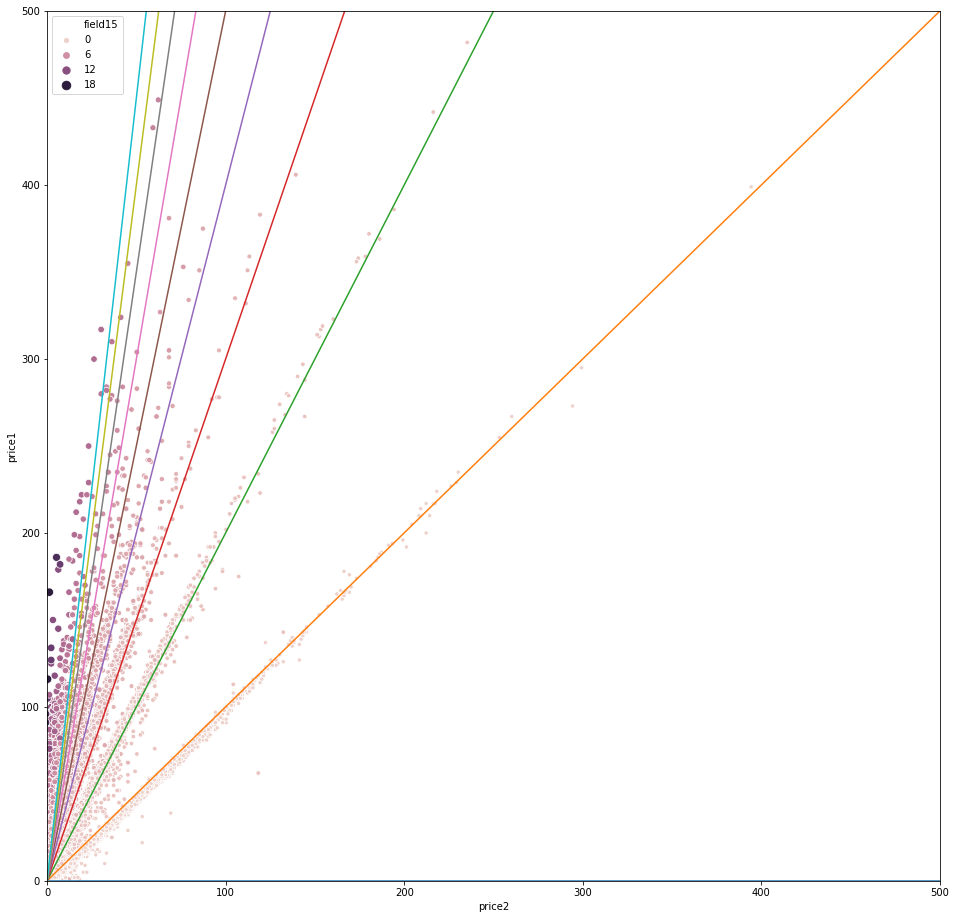

In [17]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=data,x='price2', y='price1', hue='field15',size='field15')
plt.xlim(0,500)
plt.ylim(0,500)
c = 1
coefs = [c* i for i in range(10)]
intercepts = [0]* len(coefs)
for coef, intercept in zip(coefs, intercepts):
    plt.plot([0,500],[intercept,intercept+500*coef])

In [150]:
data['multiplied_price2'] = data['price2']*data['field15']

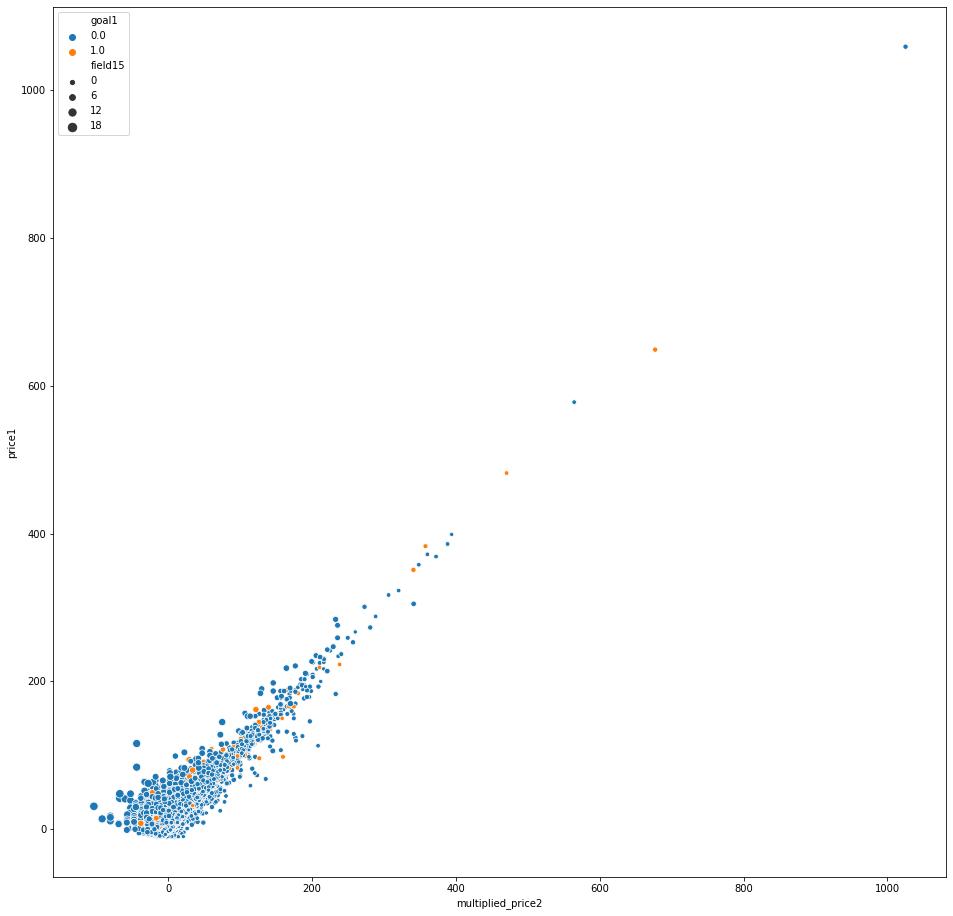

In [155]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=data[data['goal1']>=0],x='multiplied_price2', y='price1', hue='goal1',size='field15')
# plt.xlim(0,50)
# plt.ylim(0,50)

In [101]:
x_i12 = (intercepts[1] - intercepts[0]) / (coefs[0] - coefs[1])
x_i23 = (intercepts[2] - intercepts[1]) / (coefs[1] - coefs[2])
x_i13 = (intercepts[2] - intercepts[0]) / (coefs[0] - coefs[2])

In [102]:
(x_i12, x_i23, x_i13)

(-0.6415236331027085, -0.35501773299750966, -0.5740195033490669)

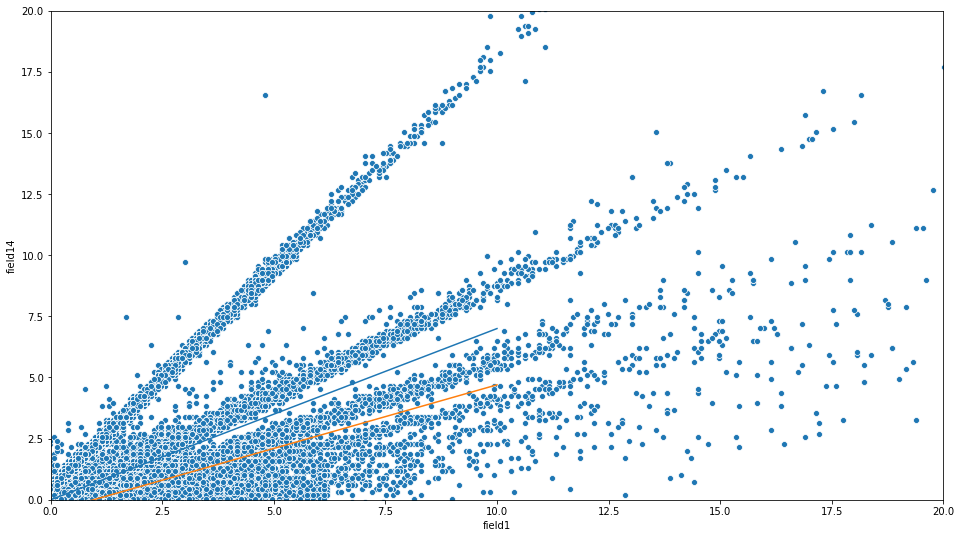

In [95]:
plt.figure(figsize=(16,9))
sns.scatterplot(data[price_field], data[price2_field])
plt.xlim(0,20)
plt.ylim(0,20)

plt.plot([0,10],[0,7])
plt.plot([0,10],[-0.5,4.7])


(0, 20)

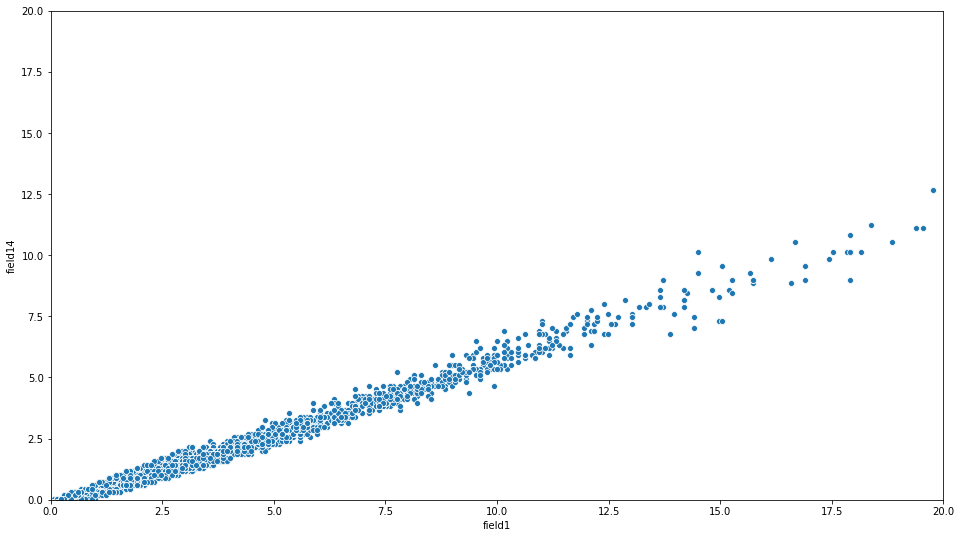

In [96]:
k_lower = 0.52
b_lower = -0.5
k_higher = 0.7
b_higher = 0
Plot = data[(data[price2_field] >= k_lower*data[price_field] + b_lower) & (data[price2_field] <= k_higher*data[price_field] + b_higher)]
plt.figure(figsize=(16,9))
sns.scatterplot(Plot[price_field], Plot[price2_field])
plt.xlim(0,20)
plt.ylim(0,20)


In [97]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(Plot[price_field].values.reshape(-1,1),  Plot[price2_field].values.reshape(-1,1))  # perform linear regression
# Y_pred = linear_regressor.predict(X)  # make predictions


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
linear_regressor.coef_

array([[0.60127357]])

In [99]:
linear_regressor.intercept_

array([-0.2428639])

In [ ]:
price_data=data[[price_field,price2_field]]
price_data[price_field] = (price_data[price_field] + 1) * 20000
price_data[price2_field] +=1